### . predecir valores de la secuencia de fibonacci con una RNA

In [7]:
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

data = [(n, fibonacci(n)) for n in range(40)]

# Imprimir el data set
for n, fib in data:
    print(f"{n}: {fib}")

0: 0
1: 1
2: 1
3: 2
4: 3
5: 5
6: 8
7: 13
8: 21
9: 34
10: 55
11: 89
12: 144
13: 233
14: 377
15: 610
16: 987
17: 1597
18: 2584
19: 4181
20: 6765
21: 10946
22: 17711
23: 28657
24: 46368
25: 75025
26: 121393
27: 196418
28: 317811
29: 514229
30: 832040
31: 1346269
32: 2178309
33: 3524578
34: 5702887
35: 9227465
36: 14930352
37: 24157817
38: 39088169
39: 63245986


In [9]:
from sklearn.linear_model import LinearRegression

X = [[n] for n, _ in data]
y = [fib for _, fib in data]

model = LinearRegression()
model.fit(X, y)

n = 20
predicted_fib = model.predict([[n]])[0]
print(f"El número de Fibonacci para n = {n} es aproximadamente: {predicted_fib:.0f}")

El número de Fibonacci para n = 20 es aproximadamente: 4417261


Con esta cantidad de datos, el modelo no resulta muy certero al tratar de predecir numeros en la secuencia de fibonacci

### Ejericio 2

In [13]:
pip install google-cloud-speech google-cloud-storage

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/285.0 kB ? eta -:--:--
   --------------------------------------- 285.0/285.0 kB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.6 kB ? eta -:--:--
   ---------------------------------------- 125.6/125.6 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/138.3 kB ? eta -:--:--
   ---------------------------------------- 138.3/138.3 kB 8.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/189.2 kB ? eta -:--:--
   ---------------------------------------- 189.2/189.2 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/80.6 kB ? eta -:--

In [23]:
pip install pyaudio

   ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
   ------- -------------------------------- 30.7/164.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 164.1/164.1 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pyaudio
import wave

def record_audio(output_file, duration):
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 16000
    CHUNK = 1024

    audio = pyaudio.PyAudio()

    stream = audio.open(format=FORMAT, channels=CHANNELS,
                        rate=RATE, input=True,
                        frames_per_buffer=CHUNK)

    frames = []

    for i in range(0, int(RATE / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)

    stream.stop_stream()
    stream.close()
    audio.terminate()

    wf = wave.open(output_file, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

record_audio('audio.wav', duration=5)

In [41]:
import io
import os
from google.cloud import speech_v1p1beta1 as speech



os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "googlecrentials.json"


def transcribe_speech(audio_file):
    client = speech.SpeechClient()

    with io.open(audio_file, "rb") as audio_file:
        content = audio_file.read()

    audio = speech.RecognitionAudio(content=content)
    config = speech.RecognitionConfig(
        encoding=speech.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=16000,
        language_code="es-ES",
    )

    response = client.recognize(config=config, audio=audio)

    for result in response.results:
        print("Transcripción: {}".format(result.alternatives[0].transcript))
        return result.alternatives[0].transcript

os.system('arecord -d 5 -r 16000 -f S16_LE audio.wav')

transcription = transcribe_speech('audio.wav')

Transcripción: fresas 26


In [42]:
def store_product(name, quantity):
    with open("inventory.txt", "a") as file:
        file.write(f"{name},{quantity}\n")


parts = transcription.split()
if len(parts) >= 2 and parts[-1].isdigit():
    quantity = int(parts[-1])
    name = " ".join(parts[:-1])
else:
    name = transcription
    quantity = 1  # 

store_product(name, quantity)

### ejercicio 3


Para este ejericio decidi presentar una especie de start up que estoy desarrollando. La pagina es quickfins.co, es una aplicacion para la gestion de finanzas personales. Entre sus servicios esta la transcripcion de voz a texto para guardar notas de gastos.

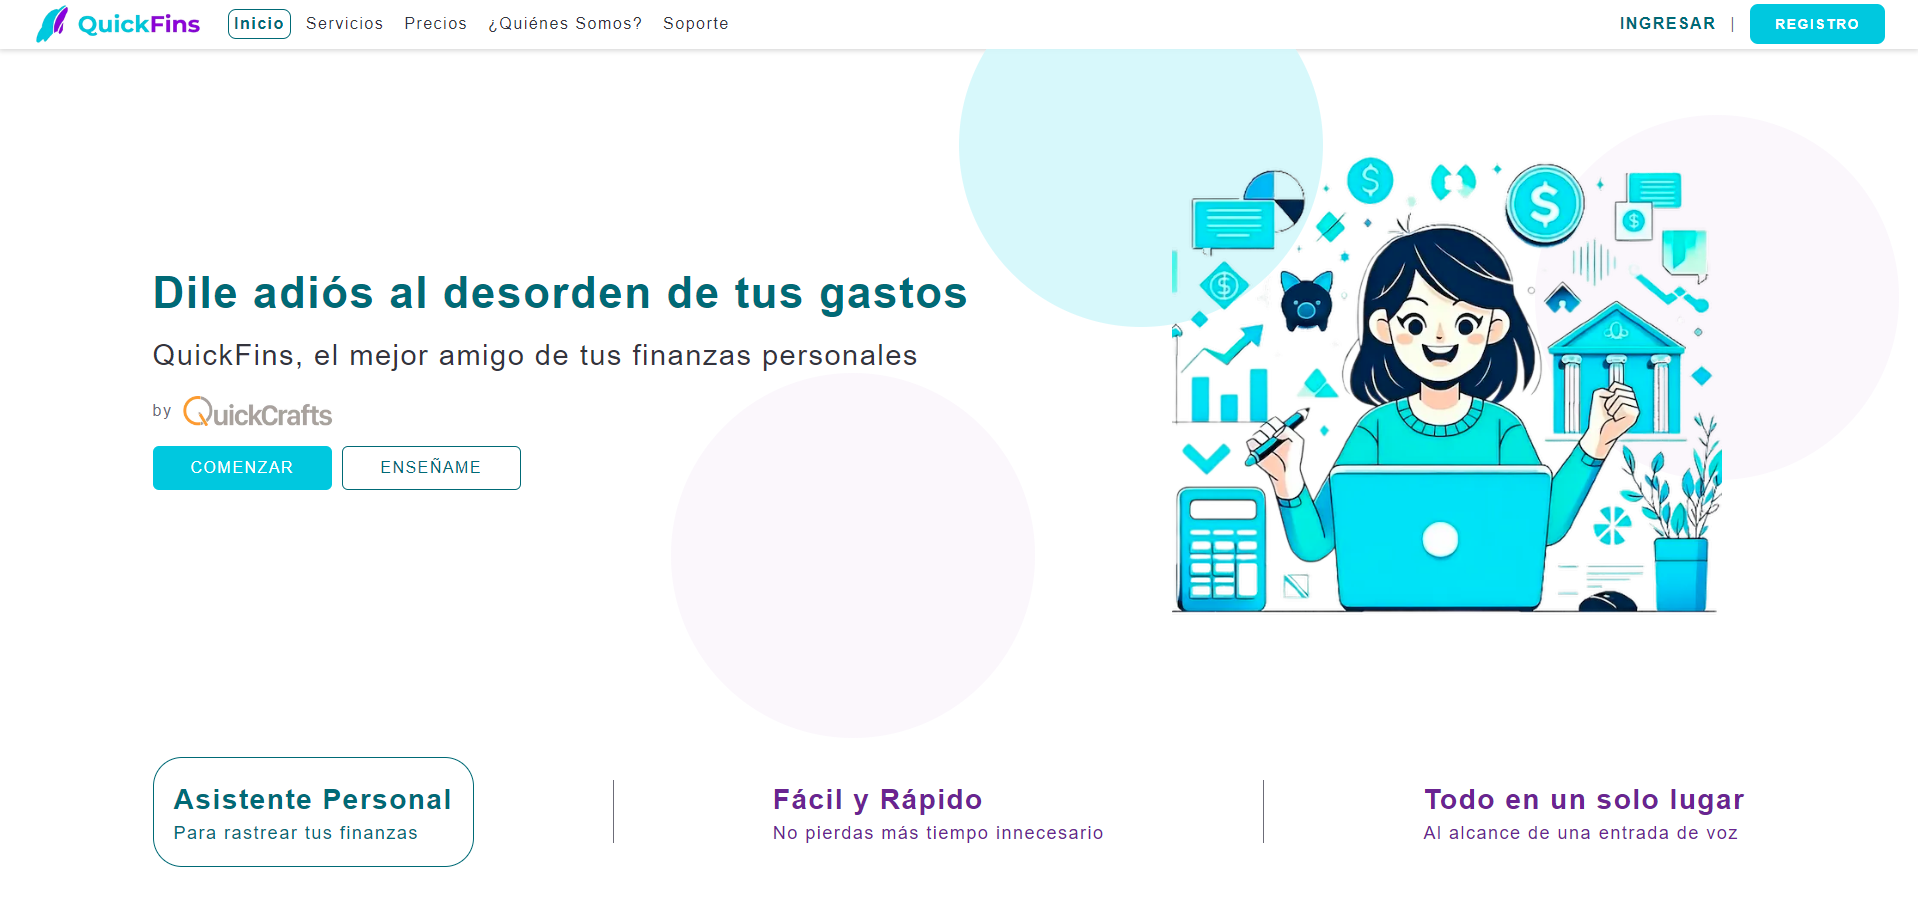

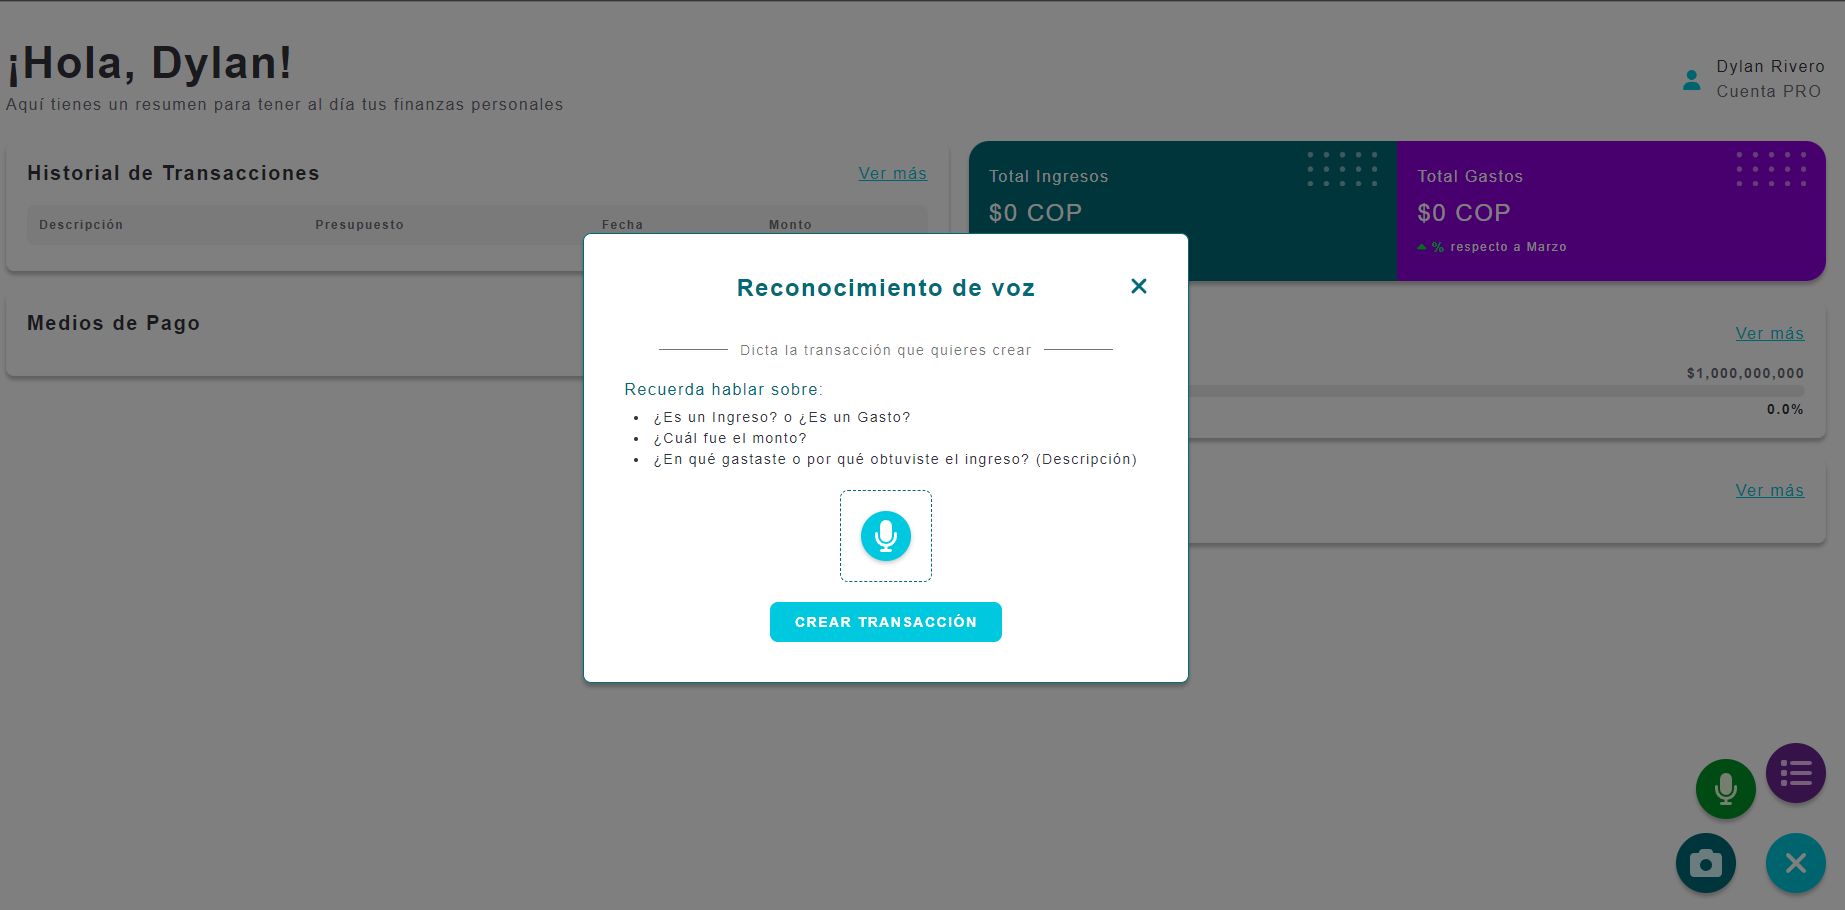

In [ ]:
import { client } from "../config/voiceClient";
import fs from "fs";
const ffmpegPath = require('@ffmpeg-installer/ffmpeg').path;
const ffmpeg = require('fluent-ffmpeg');
ffmpeg.setFfmpegPath(ffmpegPath);

function base64ToFile(dataUrl: string, filename: string) {
  const inputFile = "noBorrar.webm";
  const outputFile = "output.mp3";

  fs.writeFileSync("noBorrar.webm", dataUrl, "base64");

  const command = ffmpeg(inputFile);

  command
    .audioCodec("libmp3lame")
    .on("end", () => {
      console.log("Conversión completada");
    })
    .on("error", (err: any) => {
      console.error("Error en la conversión:", err);
    })
    .toFormat("mp3")
    .save(outputFile);
}

function dataUrlToFile(
  dataUrl: string,
  filename: string
): Uint8Array | undefined {
  const arr = dataUrl.split(",");
  if (arr.length < 2) {
    return undefined;
  }
  const mimeArr = arr[0].match(/:(.*?);/);
  if (!mimeArr || mimeArr.length < 2) {
    return undefined;
  }
  const mime = mimeArr[1];
  return new Uint8Array(Buffer.from(arr[1], "base64"));
}

export const VoiceToText = async (audio: string) => {
  const voiceClient = client;
  let result;
  let file;
  let fileWebm;

  const base64Audio = audio.split(";base64,")[1];
  const audioBuffer = Buffer.from(base64Audio, "base64");

  try {
    fs.writeFileSync("input.webm", audioBuffer);
  } catch (error) {
    console.log("Error writing file:", error);
    throw error;
  }

  try {
    await new Promise((resolve, reject) => {
      ffmpeg('input.webm')
        .output('output.wav')
        .on('end', () => {
          console.log('Conversion completed');
          resolve(null);
        })
        .on('error', (error: any) => {
          console.log('Error in conversion:', error);
          reject(error);
        })
        .run();
    });
  } catch (error) {
    console.log('Error in conversion:', error);
    throw error;
  }

  // Read the output file into a Buffer
  const wavData = fs.readFileSync('output.wav');

  try {
    const [response] = await voiceClient.recognize({
      config: {
        languageCode: "es-CO",
        audioChannelCount: 1,
      },
      audio: {
        content: wavData,
      },
    });
    const transcription = response.results;
    result = transcription?.[0].alternatives?.[0].transcript;
  } catch (error) {
    throw error;
  }

  return result as string;
};

export default VoiceToText;
